In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [16]:
# Load data
df = pd.read_csv('./harpercollins_date_during_1600.csv')

In [17]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1',"Unnamed: 0.2"], inplace=True)
df.dropna(subset = ['title'])

,title,author,publishDate,mainVersion,mainPrice,mainOriginalPrice,subVersion,subPrice,subOriginalPrice,publishDate_
1,O Investidor Inteligente - O guia classico par...,NaN,NaN,Paperback,$35.04,NaN,NaN,NaN,NaN,NaN
2,Pecar e Perdoar (Em Portugues do Brasil),Leandro Karnal,"Jan 1, 1900",Paperback,$25.27,NaN,NaN,NaN,NaN,1900-01-01
3,Por que amamos,NaN,"Jan 1, 1900",Paperback,$20.37,$52.00,Audible Audiobook,$0.00,$0.00,1900-01-01
4,Ultra-aprendizado: domine habilidades valiosas...,_,"Jan 1, 1900",Paperback,$29.00,NaN,NaN,NaN,NaN,1900-01-01
5,"Unstoppable by Green, Tim (2013) Paperback",NaN,"Jan 1, 1900",Paperback,NaN,NaN,NaN,NaN,NaN,1900-01-01
...,...,...,...,...,...,...,...,...,...,...
6075,Football Hero (Football Genius) by Tim Green (...,Hardcover,"Jan 1, 1898",Paperback,$17.45,NaN,Kindle,$9.49,$9.49,1898-01-01
6076,Winter on the Farm (Little House Picture Book)...,Laura Ingalls Wilder,"Jan 1, 1898",Paperback,$25.69,NaN,School & Library Binding,$18.80,$18.80,1898-01-01
6078,The Fury (The Vampire Diaries) by L. J. Smith ...,Mass Market Paperback,"Jan 1, 1899",Paperback,$65.51,NaN,Audible Audiobook,$0.00,$0.00,1899-01-01
6079,The Berenstain Bears Are SuperBears! (I Can Re...,Mike Berenstain,"Jan 1, 1899",Paperback,$28.41,NaN,Audible Audiobook,$0.00,$0.00,1899-01-01


In [19]:
df['publishDate_'] = pd.to_datetime(df['publishDate_'])

In [20]:
for col in ['mainPrice','mainOriginalPrice']:
    df[col] = df[col].str.replace('$','').str.replace(',','').astype(float)
    
df['discount'] = df['mainPrice']/df['mainOriginalPrice'] 

<Axes: >

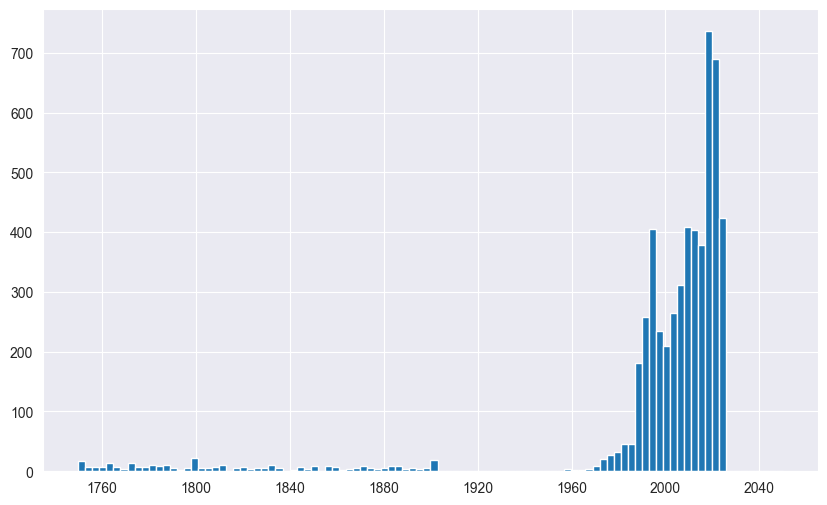

In [21]:
plt.figure(figsize=(10,6))
df['publishDate_'].hist(bins=100)

In [39]:
df = df[df['publishDate_'] > '2014-01-01']
df = df[df['publishDate_'] < '2024-08-15']
df = df.dropna(subset=['mainPrice','mainOriginalPrice','discount','publishDate_'])

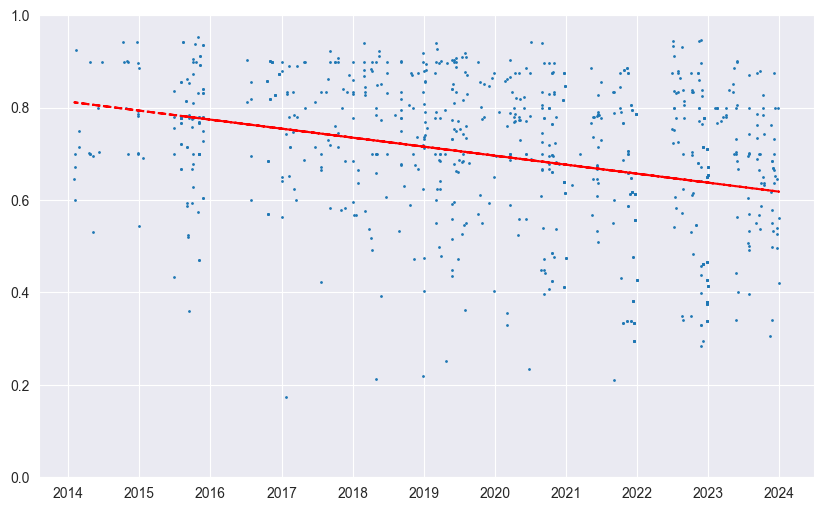

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(df['publishDate_'],df['discount'],s = 1)
plt.ylim(0,1)
x = mdates.date2num(df['publishDate_'])
y = df['discount']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [30]:
df.count()

title                2033
author               1728
publishDate          2033
mainVersion          2033
mainPrice            1742
mainOriginalPrice     832
subVersion           1739
subPrice             1667
subOriginalPrice     1667
publishDate_         2033
dtype: int64